In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv('project_data4.csv')

In [3]:
data

,발생유형,월별,시간대별,사고규모,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),...,선 종_기타(통선),선 종_낚시어선,선 종_모터보트,선 종_어선,선 종_여객선,선 종_예부선,선 종_요트,선 종_유도선,선 종_유조선,선 종_화물선
0,전복,12,6,2.659574,4.9,7.5,1027.9,51.0,4.8,1.1,...,0,1,0,0,0,0,0,0,0,0
1,화재,12,21,0.030538,2.7,4.9,1028.6,58.0,8.6,2.2,...,0,0,0,1,0,0,0,0,0,0
2,침수,12,11,0.333333,6.7,9.6,1030.0,51.0,5.1,2.8,...,0,0,0,1,0,0,0,0,0,0
3,기타,12,14,0.186235,8.8,11.8,1028.4,64.0,4.7,2.5,...,0,0,0,0,1,0,0,0,0,0
4,기타,12,13,0.238095,8.8,11.5,1029.4,63.0,4.8,3.1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16842,기관손상,1,17,2.333333,7.0,9.7,1023.9,56.0,5.0,2.3,...,0,1,0,0,0,0,0,0,0,0
16843,기관손상,1,15,0.518135,6.3,8.9,1023.9,55.0,4.4,3.0,...,0,0,0,1,0,0,0,0,0,0
16844,기관손상,1,12,2.311248,8.0,10.3,1027.0,62.0,3.0,1.3,...,0,1,0,0,0,0,0,0,0,0
16845,충돌,1,11,0.500000,6.5,9.6,1027.9,59.0,4.5,1.7,...,0,0,0,1,0,0,0,0,0,0


## concat의 기준이 범주형이 아닌 것을 전부 key로 인식해버림
## 따라서 중복된 칼럼이 발생 --> 삭제

In [4]:
data.columns

Index(['발생유형', '월별', '시간대별', '사고규모', '풍속(m/s)', 'GUST풍속(m/s)', '현지기압(hPa)',
       '습도(%)', '기온(°C)', '최대파고(m)', '파주기(sec)', '발생유형.1', '월별.1', '시간대별.1',
       '사고규모.1', '풍속(m/s).1', 'GUST풍속(m/s).1', '현지기압(hPa).1', '습도(%).1',
       '기온(°C).1', '최대파고(m).1', '파주기(sec).1', '지점_목포', '지점_보령', '지점_부산',
       '지점_서귀포', '지점_속초', '지점_여수', '지점_완도', '지점_울산', '지점_울진', '지점_인천', '지점_제주',
       '지점_태안', '지점_통영', '지점_평택', '지점_포항', '발생해역_EEZ 30마일 이내', '발생해역_공해',
       '발생해역_영해', '발생해역_영해-EEZ', '발생해역_항계 내', '발생해역_항계내', '발생해역_협수로',
       '기상상태_양호', '기상상태_저시정', '기상상태_태풍경보', '기상상태_태풍주의보', '기상상태_풍랑경보',
       '기상상태_풍랑주의보', '기상상태_황천2급', '기상상태_황천3급', '기상상태_황천4급', '기상상태_황천5급',
       '기상상태_황천6급', '선 종_고무보트', '선 종_관공선', '선 종_기타', '선 종_기타(레져선박)',
       '선 종_기타(통선)', '선 종_낚시어선', '선 종_모터보트', '선 종_어선', '선 종_여객선', '선 종_예부선',
       '선 종_요트', '선 종_유도선', '선 종_유조선', '선 종_화물선'],
      dtype='object')

In [48]:
data3 = data2.drop(['기상상태_양호', '기상상태_저시정', '기상상태_태풍경보', '기상상태_태풍주의보', '기상상태_풍랑경보',
       '기상상태_풍랑주의보', '기상상태_황천2급', '기상상태_황천3급', '기상상태_황천4급', '기상상태_황천5급',
       '기상상태_황천6급', '선 종_고무보트', '선 종_관공선', '선 종_기타', '선 종_기타(레져선박)',
       '선 종_기타(통선)', '선 종_낚시어선', '선 종_모터보트', '선 종_어선', '선 종_여객선', '선 종_예부선',
       '선 종_요트', '선 종_유도선', '선 종_유조선', '선 종_화물선'], axis=1)
data3

,발생유형,월별,시간대별,사고규모,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),...,지점_통영,지점_평택,지점_포항,발생해역_EEZ 30마일 이내,발생해역_공해,발생해역_영해,발생해역_영해-EEZ,발생해역_항계 내,발생해역_항계내,발생해역_협수로
0,전복,12,6,2.659574,4.9,7.5,1027.9,51.0,4.8,1.1,...,0,0,0,0,0,1,0,0,0,0
1,화재,12,21,0.030538,2.7,4.9,1028.6,58.0,8.6,2.2,...,0,0,0,0,0,0,0,0,1,0
2,침수,12,11,0.333333,6.7,9.6,1030.0,51.0,5.1,2.8,...,0,0,0,0,0,1,0,0,0,0
3,기타,12,14,0.186235,8.8,11.8,1028.4,64.0,4.7,2.5,...,0,0,0,0,0,1,0,0,0,0
4,기타,12,13,0.238095,8.8,11.5,1029.4,63.0,4.8,3.1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16842,기관손상,1,17,2.333333,7.0,9.7,1023.9,56.0,5.0,2.3,...,0,0,0,0,0,0,0,1,0,0
16843,기관손상,1,15,0.518135,6.3,8.9,1023.9,55.0,4.4,3.0,...,0,0,0,0,0,1,0,0,0,0
16844,기관손상,1,12,2.311248,8.0,10.3,1027.0,62.0,3.0,1.3,...,1,0,0,0,0,0,0,0,0,1
16845,충돌,1,11,0.500000,6.5,9.6,1027.9,59.0,4.5,1.7,...,0,0,0,0,0,1,0,0,0,0


In [5]:
data2 = data.drop(columns=data.columns[[11,12,13,14,15,16,17,18,19,20,21]])
data2

,발생유형,월별,시간대별,사고규모,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),...,선 종_기타(통선),선 종_낚시어선,선 종_모터보트,선 종_어선,선 종_여객선,선 종_예부선,선 종_요트,선 종_유도선,선 종_유조선,선 종_화물선
0,전복,12,6,2.659574,4.9,7.5,1027.9,51.0,4.8,1.1,...,0,1,0,0,0,0,0,0,0,0
1,화재,12,21,0.030538,2.7,4.9,1028.6,58.0,8.6,2.2,...,0,0,0,1,0,0,0,0,0,0
2,침수,12,11,0.333333,6.7,9.6,1030.0,51.0,5.1,2.8,...,0,0,0,1,0,0,0,0,0,0
3,기타,12,14,0.186235,8.8,11.8,1028.4,64.0,4.7,2.5,...,0,0,0,0,1,0,0,0,0,0
4,기타,12,13,0.238095,8.8,11.5,1029.4,63.0,4.8,3.1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16842,기관손상,1,17,2.333333,7.0,9.7,1023.9,56.0,5.0,2.3,...,0,1,0,0,0,0,0,0,0,0
16843,기관손상,1,15,0.518135,6.3,8.9,1023.9,55.0,4.4,3.0,...,0,0,0,1,0,0,0,0,0,0
16844,기관손상,1,12,2.311248,8.0,10.3,1027.0,62.0,3.0,1.3,...,0,1,0,0,0,0,0,0,0,0
16845,충돌,1,11,0.500000,6.5,9.6,1027.9,59.0,4.5,1.7,...,0,0,0,1,0,0,0,0,0,0


In [6]:
data2.columns

Index(['발생유형', '월별', '시간대별', '사고규모', '풍속(m/s)', 'GUST풍속(m/s)', '현지기압(hPa)',
       '습도(%)', '기온(°C)', '최대파고(m)', '파주기(sec)', '지점_목포', '지점_보령', '지점_부산',
       '지점_서귀포', '지점_속초', '지점_여수', '지점_완도', '지점_울산', '지점_울진', '지점_인천', '지점_제주',
       '지점_태안', '지점_통영', '지점_평택', '지점_포항', '발생해역_EEZ 30마일 이내', '발생해역_공해',
       '발생해역_영해', '발생해역_영해-EEZ', '발생해역_항계 내', '발생해역_항계내', '발생해역_협수로',
       '기상상태_양호', '기상상태_저시정', '기상상태_태풍경보', '기상상태_태풍주의보', '기상상태_풍랑경보',
       '기상상태_풍랑주의보', '기상상태_황천2급', '기상상태_황천3급', '기상상태_황천4급', '기상상태_황천5급',
       '기상상태_황천6급', '선 종_고무보트', '선 종_관공선', '선 종_기타', '선 종_기타(레져선박)',
       '선 종_기타(통선)', '선 종_낚시어선', '선 종_모터보트', '선 종_어선', '선 종_여객선', '선 종_예부선',
       '선 종_요트', '선 종_유도선', '선 종_유조선', '선 종_화물선'],
      dtype='object')

# 1. target data 세팅

In [21]:
y = data2['발생유형']
X = data2.drop(['발생유형'], axis=1)
X

,월별,시간대별,사고규모,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),파주기(sec),...,선 종_기타(통선),선 종_낚시어선,선 종_모터보트,선 종_어선,선 종_여객선,선 종_예부선,선 종_요트,선 종_유도선,선 종_유조선,선 종_화물선
0,12,6,2.659574,4.9,7.5,1027.9,51.0,4.8,1.1,6.4,...,0,1,0,0,0,0,0,0,0,0
1,12,21,0.030538,2.7,4.9,1028.6,58.0,8.6,2.2,6.4,...,0,0,0,1,0,0,0,0,0,0
2,12,11,0.333333,6.7,9.6,1030.0,51.0,5.1,2.8,4.3,...,0,0,0,1,0,0,0,0,0,0
3,12,14,0.186235,8.8,11.8,1028.4,64.0,4.7,2.5,6.4,...,0,0,0,0,1,0,0,0,0,0
4,12,13,0.238095,8.8,11.5,1029.4,63.0,4.8,3.1,6.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16842,1,17,2.333333,7.0,9.7,1023.9,56.0,5.0,2.3,9.1,...,0,1,0,0,0,0,0,0,0,0
16843,1,15,0.518135,6.3,8.9,1023.9,55.0,4.4,3.0,8.0,...,0,0,0,1,0,0,0,0,0,0
16844,1,12,2.311248,8.0,10.3,1027.0,62.0,3.0,1.3,3.4,...,0,1,0,0,0,0,0,0,0,0
16845,1,11,0.500000,6.5,9.6,1027.9,59.0,4.5,1.7,7.1,...,0,0,0,1,0,0,0,0,0,0


# 2. train_test split
- data imbalance / stratify적용

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

# 3. model 적용 RandomForest

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [26]:
y_pred = clf.predict(X_test)

# 4. model accuracy

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.37226970560303896

# 5. feature impotance를 활용하여 model accuracy 높이기 위한 반복적인 시행

In [29]:
clf.feature_importances_

array([5.65627936e-02, 7.43403044e-02, 1.13898752e-01, 8.00719168e-02,
       8.03292071e-02, 8.40358908e-02, 7.91561953e-02, 8.32116764e-02,
       7.48288982e-02, 7.24169327e-02, 9.35490163e-03, 5.98937470e-03,
       9.01156185e-03, 6.60324064e-03, 4.85705182e-03, 8.61595150e-03,
       4.80414269e-03, 5.67755545e-03, 2.66522279e-03, 6.86850714e-03,
       6.98248517e-03, 3.06906018e-03, 7.81728950e-03, 2.92698522e-03,
       7.77580051e-03, 9.00867375e-04, 8.87157944e-04, 9.03410411e-03,
       3.93687287e-03, 7.09043652e-03, 7.47052158e-03, 4.70619754e-03,
       8.13392551e-03, 3.14555919e-03, 8.45882892e-04, 1.22576364e-04,
       6.23127712e-04, 3.50414786e-03, 3.15440015e-05, 9.03842029e-05,
       1.22222873e-03, 3.31077550e-03, 1.27605580e-03, 3.44375357e-03,
       1.09157602e-03, 4.35479965e-03, 3.07349615e-04, 1.74542073e-05,
       5.04609172e-03, 8.43895961e-03, 1.07103302e-02, 2.42651027e-03,
       4.34228022e-03, 2.91319809e-03, 1.18518991e-03, 3.49796810e-03,
      

In [46]:
def plot_feature_importances_cancer(model):
    n_features = data2.shape[1] - 1 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns, size = 10)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [42]:
import matplotlib.pyplot as plt

In [39]:
data2.shape

(16847, 58)

In [40]:
len(clf.feature_importances_)

57

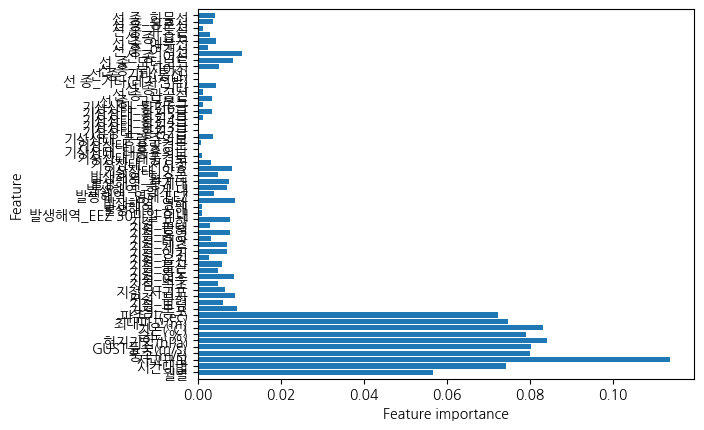

In [47]:
plot_feature_importances_cancer(clf)

In [49]:
y = data3['발생유형']
X = data3.drop(['발생유형'], axis=1)
X

,월별,시간대별,사고규모,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),파주기(sec),...,지점_통영,지점_평택,지점_포항,발생해역_EEZ 30마일 이내,발생해역_공해,발생해역_영해,발생해역_영해-EEZ,발생해역_항계 내,발생해역_항계내,발생해역_협수로
0,12,6,2.659574,4.9,7.5,1027.9,51.0,4.8,1.1,6.4,...,0,0,0,0,0,1,0,0,0,0
1,12,21,0.030538,2.7,4.9,1028.6,58.0,8.6,2.2,6.4,...,0,0,0,0,0,0,0,0,1,0
2,12,11,0.333333,6.7,9.6,1030.0,51.0,5.1,2.8,4.3,...,0,0,0,0,0,1,0,0,0,0
3,12,14,0.186235,8.8,11.8,1028.4,64.0,4.7,2.5,6.4,...,0,0,0,0,0,1,0,0,0,0
4,12,13,0.238095,8.8,11.5,1029.4,63.0,4.8,3.1,6.4,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16842,1,17,2.333333,7.0,9.7,1023.9,56.0,5.0,2.3,9.1,...,0,0,0,0,0,0,0,1,0,0
16843,1,15,0.518135,6.3,8.9,1023.9,55.0,4.4,3.0,8.0,...,0,0,0,0,0,1,0,0,0,0
16844,1,12,2.311248,8.0,10.3,1027.0,62.0,3.0,1.3,3.4,...,1,0,0,0,0,0,0,0,0,1
16845,1,11,0.500000,6.5,9.6,1027.9,59.0,4.5,1.7,7.1,...,0,0,0,0,0,1,0,0,0,0


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [52]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.3637226970560304

In [53]:
clf.feature_importances_

array([0.0596356 , 0.08131074, 0.12577738, 0.08806137, 0.08983547,
       0.09389477, 0.08742735, 0.09320958, 0.08210777, 0.07987714,
       0.0078251 , 0.0055974 , 0.00846738, 0.0066644 , 0.00482004,
       0.00756225, 0.00439841, 0.00623252, 0.00275646, 0.00677778,
       0.00726487, 0.00297083, 0.00685312, 0.00256076, 0.00842924,
       0.00097382, 0.00096933, 0.0072857 , 0.00393853, 0.00589216,
       0.00663036, 0.00399241])

In [54]:
def plot_feature_importances_cancer(model):
    n_features = X.shape[1] 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns, size = 10)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

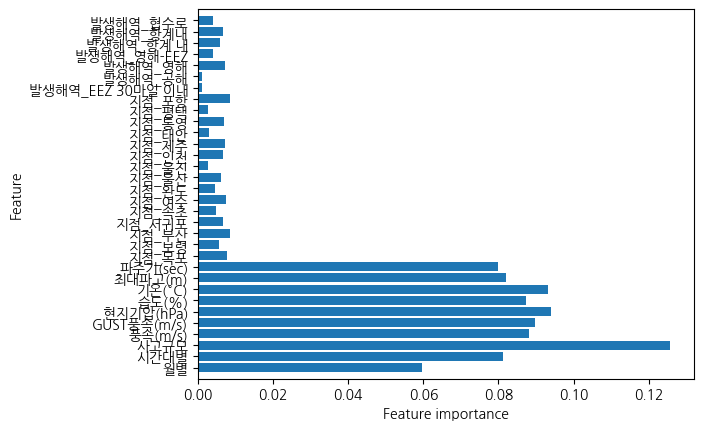

In [55]:
plot_feature_importances_cancer(clf)

In [56]:
data3.columns

Index(['발생유형', '월별', '시간대별', '사고규모', '풍속(m/s)', 'GUST풍속(m/s)', '현지기압(hPa)',
       '습도(%)', '기온(°C)', '최대파고(m)', '파주기(sec)', '지점_목포', '지점_보령', '지점_부산',
       '지점_서귀포', '지점_속초', '지점_여수', '지점_완도', '지점_울산', '지점_울진', '지점_인천', '지점_제주',
       '지점_태안', '지점_통영', '지점_평택', '지점_포항', '발생해역_EEZ 30마일 이내', '발생해역_공해',
       '발생해역_영해', '발생해역_영해-EEZ', '발생해역_항계 내', '발생해역_항계내', '발생해역_협수로'],
      dtype='object')

In [57]:
data4 = data3.drop(['발생해역_EEZ 30마일 이내', '발생해역_공해','발생해역_영해', '발생해역_영해-EEZ', '발생해역_항계 내', '발생해역_항계내', '발생해역_협수로'], axis=1)
data4

,발생유형,월별,시간대별,사고규모,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),...,지점_여수,지점_완도,지점_울산,지점_울진,지점_인천,지점_제주,지점_태안,지점_통영,지점_평택,지점_포항
0,전복,12,6,2.659574,4.9,7.5,1027.9,51.0,4.8,1.1,...,1,0,0,0,0,0,0,0,0,0
1,화재,12,21,0.030538,2.7,4.9,1028.6,58.0,8.6,2.2,...,0,0,0,0,0,0,0,0,0,0
2,침수,12,11,0.333333,6.7,9.6,1030.0,51.0,5.1,2.8,...,0,0,0,0,0,0,0,0,0,0
3,기타,12,14,0.186235,8.8,11.8,1028.4,64.0,4.7,2.5,...,0,0,0,0,0,0,0,0,0,0
4,기타,12,13,0.238095,8.8,11.5,1029.4,63.0,4.8,3.1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16842,기관손상,1,17,2.333333,7.0,9.7,1023.9,56.0,5.0,2.3,...,0,0,1,0,0,0,0,0,0,0
16843,기관손상,1,15,0.518135,6.3,8.9,1023.9,55.0,4.4,3.0,...,0,0,1,0,0,0,0,0,0,0
16844,기관손상,1,12,2.311248,8.0,10.3,1027.0,62.0,3.0,1.3,...,0,0,0,0,0,0,0,1,0,0
16845,충돌,1,11,0.500000,6.5,9.6,1027.9,59.0,4.5,1.7,...,1,0,0,0,0,0,0,0,0,0


In [58]:
y = data4['발생유형']
X = data4.drop(['발생유형'], axis=1)
X

,월별,시간대별,사고규모,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),파주기(sec),...,지점_여수,지점_완도,지점_울산,지점_울진,지점_인천,지점_제주,지점_태안,지점_통영,지점_평택,지점_포항
0,12,6,2.659574,4.9,7.5,1027.9,51.0,4.8,1.1,6.4,...,1,0,0,0,0,0,0,0,0,0
1,12,21,0.030538,2.7,4.9,1028.6,58.0,8.6,2.2,6.4,...,0,0,0,0,0,0,0,0,0,0
2,12,11,0.333333,6.7,9.6,1030.0,51.0,5.1,2.8,4.3,...,0,0,0,0,0,0,0,0,0,0
3,12,14,0.186235,8.8,11.8,1028.4,64.0,4.7,2.5,6.4,...,0,0,0,0,0,0,0,0,0,0
4,12,13,0.238095,8.8,11.5,1029.4,63.0,4.8,3.1,6.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16842,1,17,2.333333,7.0,9.7,1023.9,56.0,5.0,2.3,9.1,...,0,0,1,0,0,0,0,0,0,0
16843,1,15,0.518135,6.3,8.9,1023.9,55.0,4.4,3.0,8.0,...,0,0,1,0,0,0,0,0,0,0
16844,1,12,2.311248,8.0,10.3,1027.0,62.0,3.0,1.3,3.4,...,0,0,0,0,0,0,0,1,0,0
16845,1,11,0.500000,6.5,9.6,1027.9,59.0,4.5,1.7,7.1,...,1,0,0,0,0,0,0,0,0,0


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [60]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.3603988603988604

In [61]:
data5 = data4.drop(['지점_목포', '지점_보령', '지점_부산','지점_서귀포', '지점_속초', '지점_여수', '지점_완도', '지점_울산', '지점_울진', '지점_인천', '지점_제주',
       '지점_태안', '지점_통영', '지점_평택', '지점_포항'], axis=1)
data5

,발생유형,월별,시간대별,사고규모,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),파주기(sec)
0,전복,12,6,2.659574,4.9,7.5,1027.9,51.0,4.8,1.1,6.4
1,화재,12,21,0.030538,2.7,4.9,1028.6,58.0,8.6,2.2,6.4
2,침수,12,11,0.333333,6.7,9.6,1030.0,51.0,5.1,2.8,4.3
3,기타,12,14,0.186235,8.8,11.8,1028.4,64.0,4.7,2.5,6.4
4,기타,12,13,0.238095,8.8,11.5,1029.4,63.0,4.8,3.1,6.4
...,...,...,...,...,...,...,...,...,...,...,...
16842,기관손상,1,17,2.333333,7.0,9.7,1023.9,56.0,5.0,2.3,9.1
16843,기관손상,1,15,0.518135,6.3,8.9,1023.9,55.0,4.4,3.0,8.0
16844,기관손상,1,12,2.311248,8.0,10.3,1027.0,62.0,3.0,1.3,3.4
16845,충돌,1,11,0.500000,6.5,9.6,1027.9,59.0,4.5,1.7,7.1


In [62]:
y = data5['발생유형']
X = data5.drop(['발생유형'], axis=1)
X

,월별,시간대별,사고규모,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),파주기(sec)
0,12,6,2.659574,4.9,7.5,1027.9,51.0,4.8,1.1,6.4
1,12,21,0.030538,2.7,4.9,1028.6,58.0,8.6,2.2,6.4
2,12,11,0.333333,6.7,9.6,1030.0,51.0,5.1,2.8,4.3
3,12,14,0.186235,8.8,11.8,1028.4,64.0,4.7,2.5,6.4
4,12,13,0.238095,8.8,11.5,1029.4,63.0,4.8,3.1,6.4
...,...,...,...,...,...,...,...,...,...,...
16842,1,17,2.333333,7.0,9.7,1023.9,56.0,5.0,2.3,9.1
16843,1,15,0.518135,6.3,8.9,1023.9,55.0,4.4,3.0,8.0
16844,1,12,2.311248,8.0,10.3,1027.0,62.0,3.0,1.3,3.4
16845,1,11,0.500000,6.5,9.6,1027.9,59.0,4.5,1.7,7.1


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [64]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.33404558404558404

In [65]:
clf.feature_importances_

array([0.05694854, 0.0851524 , 0.14728602, 0.09875623, 0.09950021,
       0.11386823, 0.10295093, 0.11338507, 0.09348914, 0.08866324])

## 최종적으로 model자체는 37%를 넘지 못함
- multiclassification 1/18 = 0.05 높다는 의의
- feature importance에 따른 모델 변경에도 처음 나온 값을 넘지 못함